# Credit Card Fraud Detection using Machine Learning

This notebook demonstrates a step-by-step approach to detecting fraudulent credit card transactions using a combination of machine learning techniques. We will perform:
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Model Training and Evaluation
- Model Deployment using FastAPI and Azure ML

In [19]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Machine Learning / Anomaly Detection
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# FastAPI for Real-time Deployment
from fastapi import FastAPIb
from pydantic import BaseModel
import uvicorn

# Azure ML
from azureml.core import Workspace, Experiment, Dataset, Environment, Model
from azureml.core.webservice import Webservice
from azureml.core.model import InferenceConfig
from azureml.core.compute import AmlCompute, ComputeTarget


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous utilities
import os
import json

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [4]:
df = pd.read_csv('creditcard_2023.csv')
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.dtypes

id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Exploratory Data Analysis (EDA)
Before proceeding with model training, we first explore the dataset to understand the distribution of fraudulent and non-fraudulent transactions.


In [9]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


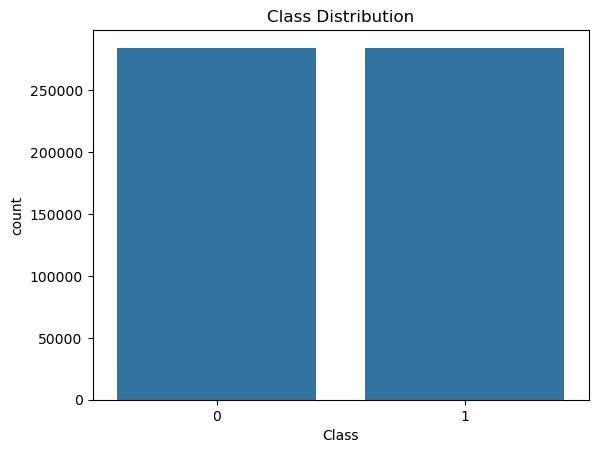

In [10]:
sns.countplot(x= 'Class', data=df)
plt.title("Class Distribution")
plt.show()

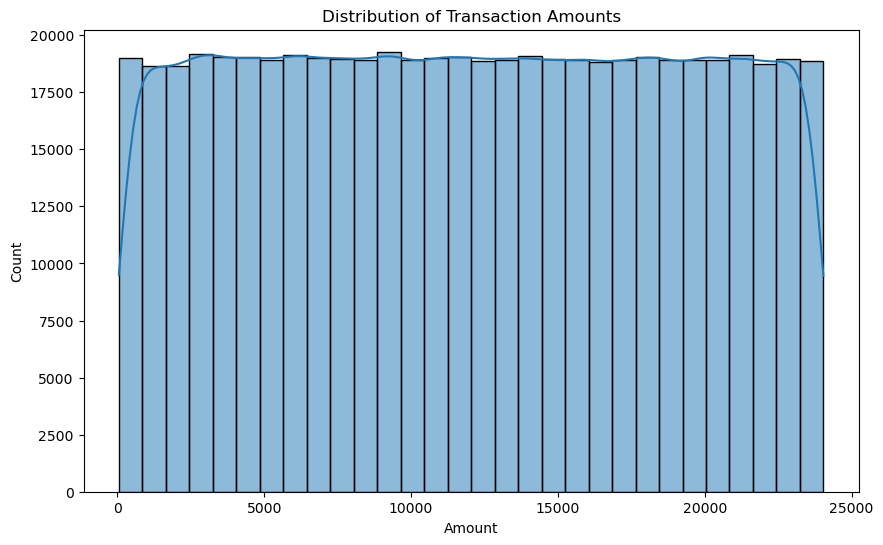

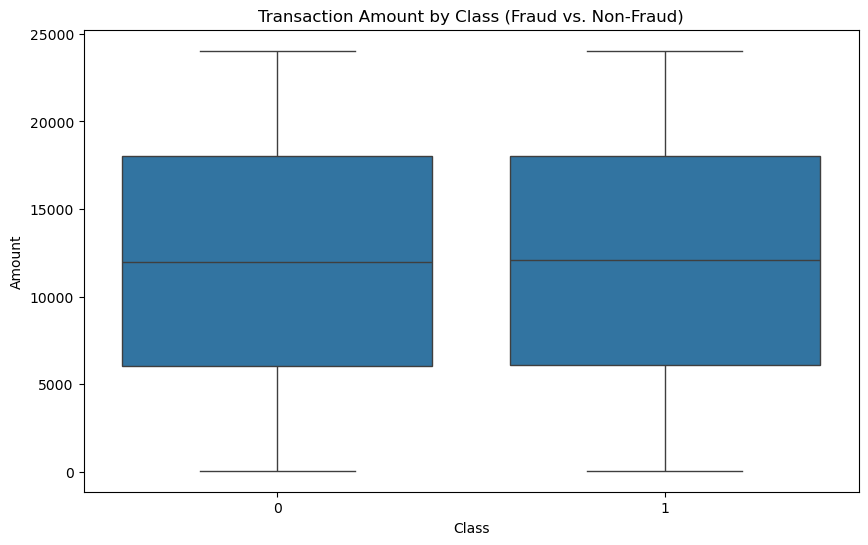

In [11]:
# Visualize the distribution of the 'Amount' feature
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], kde=True, bins=30)
plt.title('Distribution of Transaction Amounts')
plt.show()

# Visualize the 'Amount' feature by class (fraud vs. non-fraud)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class (Fraud vs. Non-Fraud)')
plt.show()

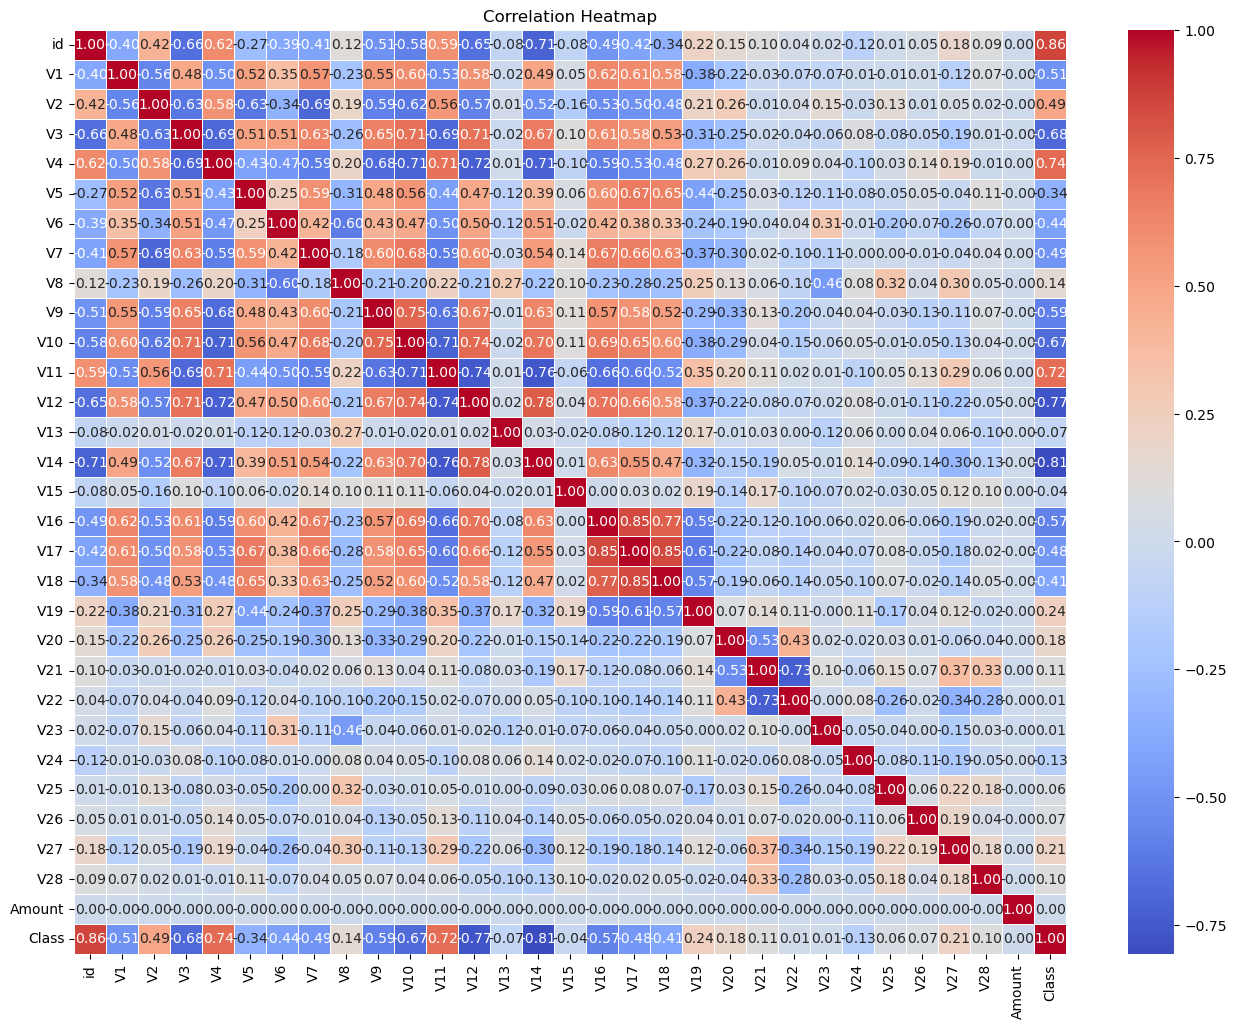

In [12]:
# Correlation heatmap (if you're interested in feature relationships)
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
df.corr()['Class']

id        0.864283
V1       -0.505761
V2        0.491878
V3       -0.682095
V4        0.735981
V5       -0.338639
V6       -0.435088
V7       -0.491234
V8        0.144294
V9       -0.585522
V10      -0.673665
V11       0.724278
V12      -0.768579
V13      -0.071105
V14      -0.805669
V15      -0.037948
V16      -0.573511
V17      -0.476377
V18      -0.410091
V19       0.244081
V20       0.179851
V21       0.109640
V22       0.014098
V23       0.010255
V24      -0.130107
V25       0.061847
V26       0.071052
V27       0.214002
V28       0.102024
Amount    0.002261
Class     1.000000
Name: Class, dtype: float64

## Data Preprocessing
We will preprocess the dataset by:
- Removing unnecessary columns (`id`, `Amount`)
- Splitting the dataset into train, validation, and test sets
- Scaling the features using `StandardScaler`


In [15]:
df= df.drop(columns=['id', 'Amount'])

In [27]:

# Features (all columns except 'Class')
X = df.drop(columns=['Class'])

# Target (the 'Class' column)
y = df['Class']

# Split into Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split Train further into Train (80%) and Validation (20%) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

print(f"Train set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

Train set: (363923, 26)
Validation set: (90981, 26)
Test set: (113726, 26)


In [28]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

## Neural Network Model
The model consists of a simple feedforward neural network with:
- Three hidden layers
- `ReLU` activation for hidden layers
- `Dropout` layers for regularization
- `Sigmoid` activation for the output layer (for binary classification)

## Training the Neural Network
We train the model using the `Adam` optimizer and `binary_crossentropy` loss. The model is validated using the validation set.


Epoch 1/6
11373/11373 [==============================] - 31s 3ms/step - loss: 0.0445 - accuracy: 0.9848 - val_loss: 0.0087 - val_accuracy: 0.9979
Epoch 2/6
11373/11373 [==============================] - 36s 3ms/step - loss: 0.0143 - accuracy: 0.9958 - val_loss: 0.0067 - val_accuracy: 0.9983
Epoch 3/6
11373/11373 [==============================] - 40s 4ms/step - loss: 0.0112 - accuracy: 0.9968 - val_loss: 0.0067 - val_accuracy: 0.9983
Epoch 4/6
11373/11373 [==============================] - 37s 3ms/step - loss: 0.0100 - accuracy: 0.9972 - val_loss: 0.0057 - val_accuracy: 0.9985
Epoch 5/6
11373/11373 [==============================] - 36s 3ms/step - loss: 0.0087 - accuracy: 0.9976 - val_loss: 0.0037 - val_accuracy: 0.9991
Epoch 6/6
3554/3554 [==============================] - 7s 2ms/step - loss: 0.0047 - accuracy: 0.9989
Test Accuracy: 0.9989


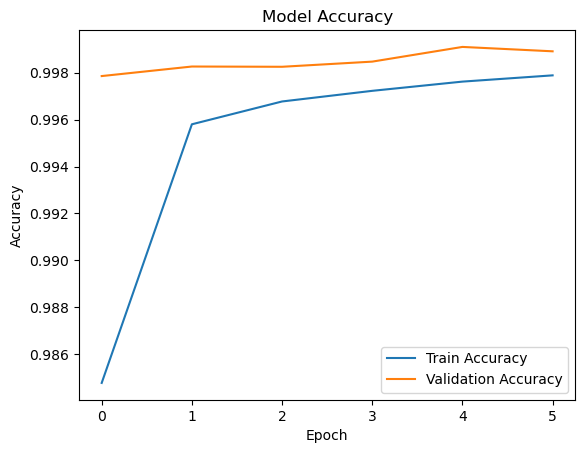

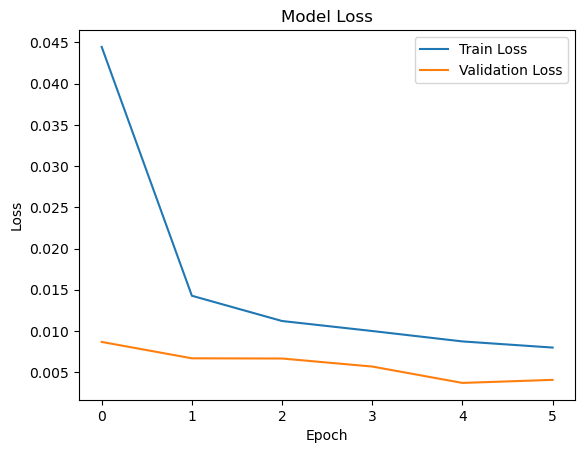

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Build the neural network
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.2),  # Add dropout
    Dense(32, activation='relu'),
    Dropout(0.2),  # Add dropout
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with validation set
history = model.fit(X_train_scaled, y_train, 
                    epochs=6, 
                    batch_size=32, 
                    validation_data=(X_val_scaled, y_val))  # Now using validation set

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Model Performance Evaluation
We evaluate the trained model using:
- Accuracy
- Confusion Matrix
- Classification Report
- ROC-AUC Score

AUC-ROC helps us understand how well the model differentiates between fraudulent and non-fraudulent transactions.


In [30]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict the class labels
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to class labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Compute classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)


3554/3554 [==============================] - 6s 2ms/step
Confusion Matrix:
 [[56795    68]
 [    1 56862]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

ROC-AUC Score: 0.9999541589457698


## Model Deployment with FastAPI & Azure ML
After successful training, the model can be deployed using:
- **FastAPI**: For real-time fraud detection API
- **Azure ML**: To host the model on the cloud for large-scale fraud detection


In [39]:
from azureml.core import Workspace, Model

In [37]:
ws = Workspace.from_config()  # Uses config.json in your working directory
print("Workspace loaded:", ws.name)

Workspace loaded: FraudDetection


In [38]:
import os

model_path = "fraud_model"
tf.keras.models.save_model(model, model_path)

INFO:tensorflow:Assets written to: fraud_model\assets


INFO:tensorflow:Assets written to: fraud_model\assets


In [40]:
model = Model.register(
    workspace=ws,
    model_name="fraud-detection-model",
    model_path=model_path,
    description="Fraud detection model using TensorFlow"
)

print("Model registered:", model.name)


Registering model fraud-detection-model
Model registered: fraud-detection-model


In [ ]:
import json
import tensorflow as tf
import numpy as np
from azureml.core.model import Model
from flask import Flask, request, jsonify

app = Flask(__name__)

# Load the model
def init():
    global model
    model = tf.keras.models.load_model(model_path)

init()  # Initialize the model

@app.route("/predict", methods=["POST"])
def run():
    try:
        data = request.get_json()
        input_data = np.array(data["data"]).astype(np.float32)
        predictions = model.predict(input_data).tolist()
        return jsonify(predictions)
    except Exception as e:
        return jsonify({"error": str(e)}), 400

if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.2.90:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
from azureml.core import Model, Workspace, InferenceConfig
from azureml.core.webservice import AciWebservice, Webservice

# Connect to Azure ML workspace
ws = Workspace.from_config()

# Load the registered model
model = Model(ws, "fraud-detection-model")

# Define inference configuration
inference_config = InferenceConfig(entry_script="score.py", runtime="python", source_directory=".")

# Define deployment configuration
deployment_config = AciWebservice.deploy_configuration(cpu_cores=1, memory_gb=1)

# Deploy as an ACI web service
service = Model.deploy(ws, "fraud-detection-service", [model], inference_config, deployment_config)

service.wait_for_deployment(show_output=True)
print(f"Service deployed at: {service.scoring_uri}")
